# Isotropic Diffusion via Heat Equation
<hr>

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

In [2]:
I_color = img.imread('selfie.jpg')     

## check the size of image and convert 3D to 2D if necessary

In [3]:
n_dimension = I_color.shape[2]     

if n_dimension == 3:
    I = I_color.mean(axis=2)     # 평균을 구해 3차원에서 2차원 데이터로 변환

n_dimension = I.ndim     # 이미지의 dimension
n_row       = I.shape[0]     # 이미지의 row 
n_col       = I.shape[1]     # 이미지의 columns

print("number of dimension = ", n_dimension)
print("number of rows = ", n_row)
print("number of columns = ", n_col)

number of dimension =  2
number of rows =  720
number of columns =  720


(-0.5, 719.5, 719.5, -0.5)

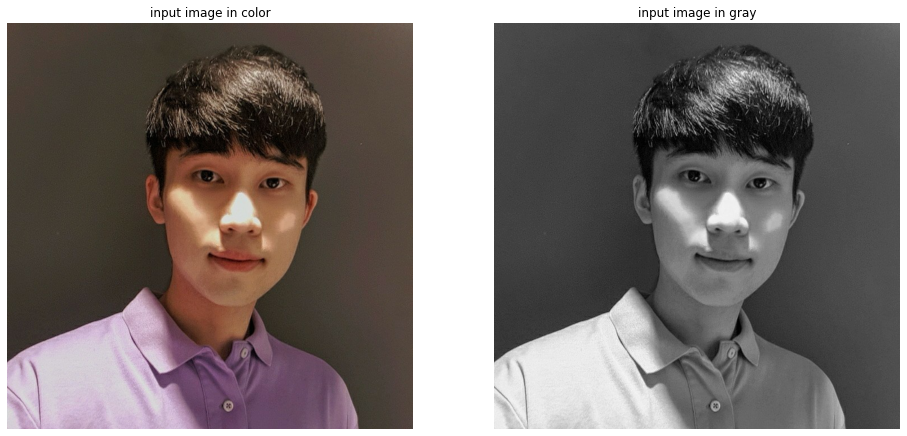

In [4]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(I_color)
plt.title('input image in color')
plt.axis('off')

plt.subplot(122)
plt.imshow(I, cmap='gray')
plt.title('input image in gray')
plt.axis('off')

## normalize input image so that the range of image is $[0, 1]$

In [5]:
I = (I - np.min(I)) / (np.max(I) - np.min(I))     # min max normalization

## define a function to compute the first-order derivatives with Neumann boundary condition

In [6]:
def compute_derivative_first_order(data, axis, scheme, boundary):
    if boundary == 'neumann':
        D = np.pad(data, ((1,1),(1,1)), mode='edge')     # 패딩

    if axis == 'x':
        if scheme == 'forward':
            derivative = np.roll(D, shift=-1, axis=1) - D
        elif scheme == 'backward':
            derivative = D - np.roll(D, shift=1, axis=1)
        else:     # scheme == central
            derivative = (np.roll(D, shift=-1, axis=1) - np.roll(D, shift=1, axis=1)) / 2
        
    elif axis == 'y':
        if scheme == 'forward':
            derivative = np.roll(D, shift=-1, axis=0) - D
        elif scheme == 'backward':
            derivative = D - np.roll(D, shift=1, axis=0)
        else:     # scheme == central
            derivative = (np.roll(D, shift=-1, axis=0) - np.roll(D, shift=1, axis=0)) / 2
        
    dD = derivative[1:-1, 1:-1]     # 첫번째와 마지막 row, column을 제거
    return(dD)

## define a function to compute the second-order derivatives with Neumann boundary condition

In [7]:
def compute_derivative_second_order(data, axis):
    D_forward   = compute_derivative_first_order(data, axis, 'forward', 'neumann')
    D_backward  = compute_derivative_first_order(data, axis, 'backward', 'neumann')
    dDdD  = D_forward - D_backward   
    return(dDdD)

## define a function to compute heat equation

In [8]:
def heat_equation(data, delta_t, number_iteration):
    u = data   
    for t in range(number_iteration):
        laplace = compute_derivative_second_order(u, 'x') + compute_derivative_second_order(u, 'y')
        u       = u + delta_t * laplace 
    return(u)

In [9]:
delta_t = 0.1     # delta t in the heat equation
u10     = heat_equation(I, delta_t, 10)     # heat equation with 10 iterations
u100    = heat_equation(I, delta_t, 100)     # heat equation with 100 iterations
u1000   = heat_equation(I, delta_t, 1000)     # heat equation with 1000 iterations

(-0.5, 719.5, 719.5, -0.5)

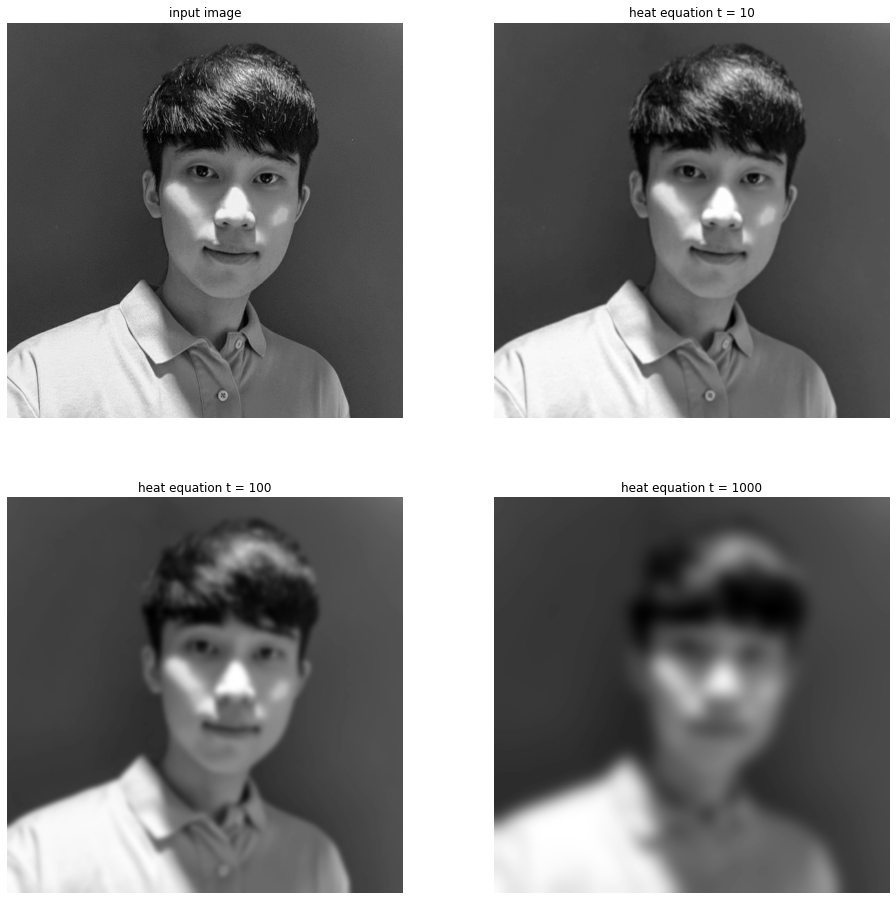

In [10]:
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.imshow(I, cmap='gray')
plt.title('input image')
plt.axis('off')

plt.subplot(222)
plt.imshow(u10, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

plt.subplot(223)
plt.imshow(u100, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

plt.subplot(224)
plt.imshow(u1000, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

## compute the (forward) first-order derivative of the solutions obtained by heat equation

In [11]:
Ix      = compute_derivative_first_order(I, 'x', 'forward', 'neumann')     # I_x using forward scheme
Iy      = compute_derivative_first_order(I, 'y', 'forward', 'neumann')     # I_y using forward scheme

u10_x   = compute_derivative_first_order(u10, 'x', 'forward', 'neumann')     # u(10)_x using forward scheme
u10_y   = compute_derivative_first_order(u10, 'y', 'forward', 'neumann')     # u(10)_y using forward scheme

u100_x  = compute_derivative_first_order(u100, 'x', 'forward', 'neumann')     # u(100)_x using forward scheme
u100_y  = compute_derivative_first_order(u100, 'y', 'forward', 'neumann')     # u(100)_y using forward scheme

u1000_x = compute_derivative_first_order(u1000, 'x', 'forward', 'neumann')     # u(1000)_x using forward scheme
u1000_y = compute_derivative_first_order(u1000, 'y', 'forward', 'neumann')     # u(1000)_y using forward scheme

(-0.5, 719.5, 719.5, -0.5)

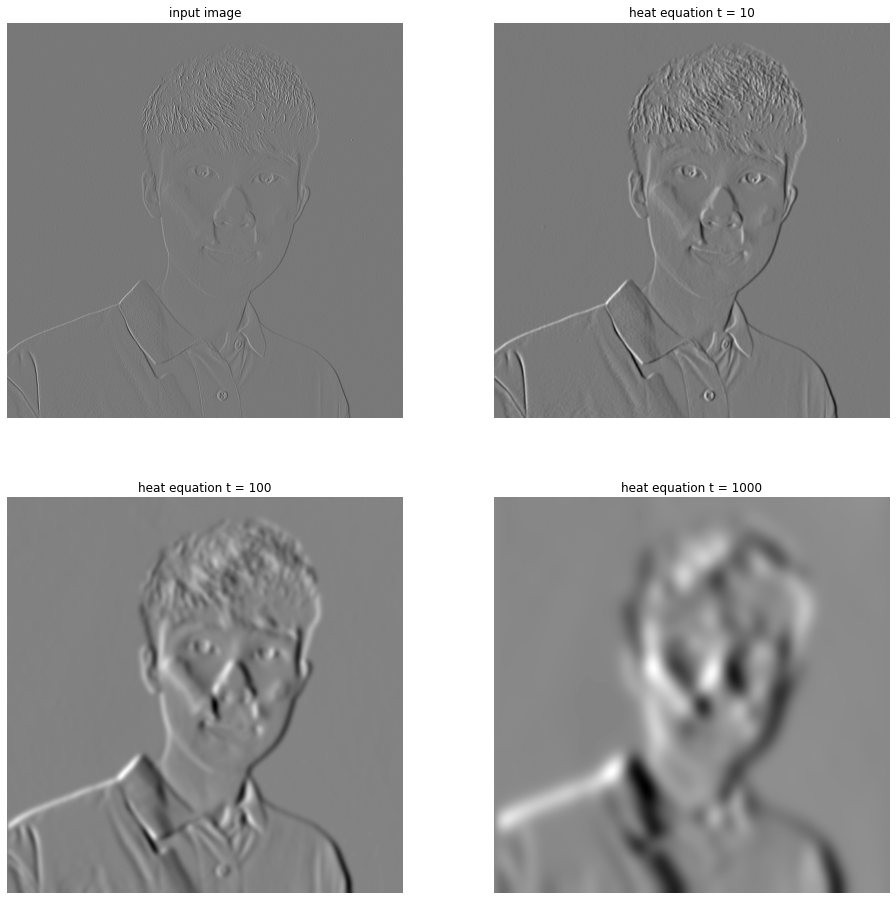

In [12]:
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.imshow(Ix, cmap='gray')
plt.title('input image')
plt.axis('off')

plt.subplot(222)
plt.imshow(u10_x, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

plt.subplot(223)
plt.imshow(u100_x, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

plt.subplot(224)
plt.imshow(u1000_x, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

(-0.5, 719.5, 719.5, -0.5)

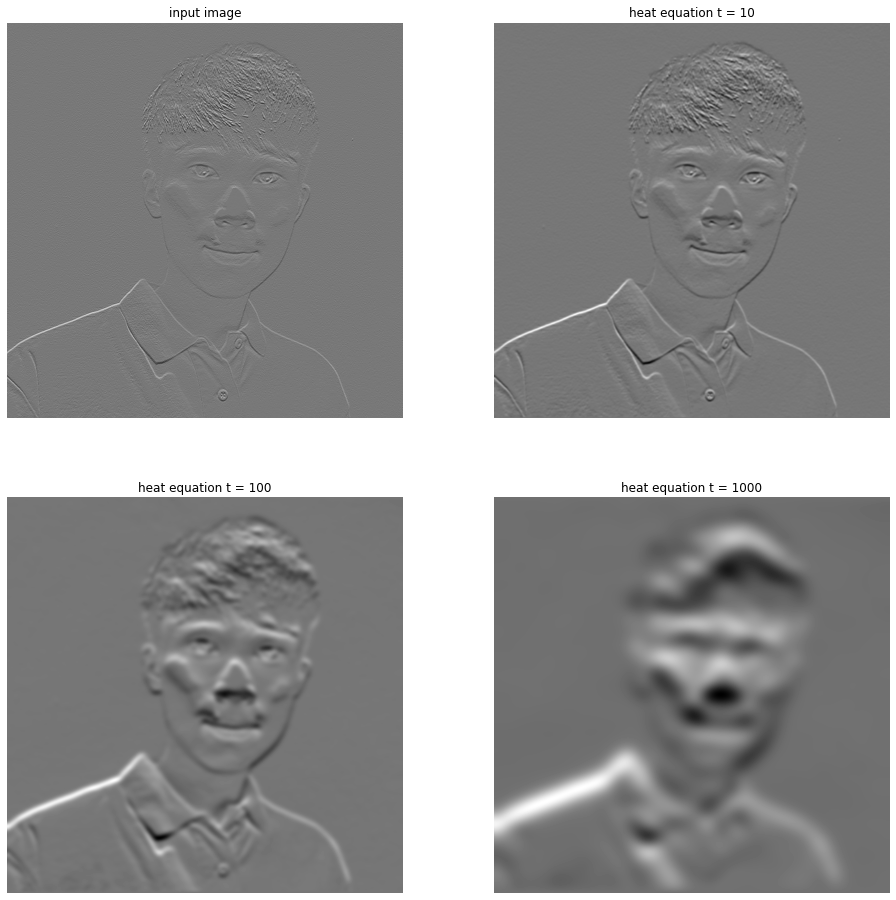

In [13]:
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.imshow(Iy, cmap='gray')
plt.title('input image')
plt.axis('off')

plt.subplot(222)
plt.imshow(u10_y, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

plt.subplot(223)
plt.imshow(u100_y, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

plt.subplot(224)
plt.imshow(u1000_y, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

## compute the second-order derivative of the solutions obtained by heat equation

In [14]:
Ixx         = compute_derivative_second_order(I, 'x')     # second derivative I_xx in x-direction
Iyy         = compute_derivative_second_order(I, 'y')     # second derivative I_yy in y-direction

u10_xx      = compute_derivative_second_order(u10, 'x')     # second derivative u(10)_xx in x-direction
u10_yy      = compute_derivative_second_order(u10, 'y')     # second derivative u(10)_yy in y-direction

u100_xx     = compute_derivative_second_order(u100, 'x')     # second derivative u(100)_xx in x-direction
u100_yy     = compute_derivative_second_order(u100, 'y')     # second derivative u(100)_yy in y-direction

u1000_xx    = compute_derivative_second_order(u1000, 'x')     # second derivative u(1000)_xx in x-direction
u1000_yy    = compute_derivative_second_order(u1000, 'y')     # second derivative u(1000)_yy in y-direction

(-0.5, 719.5, 719.5, -0.5)

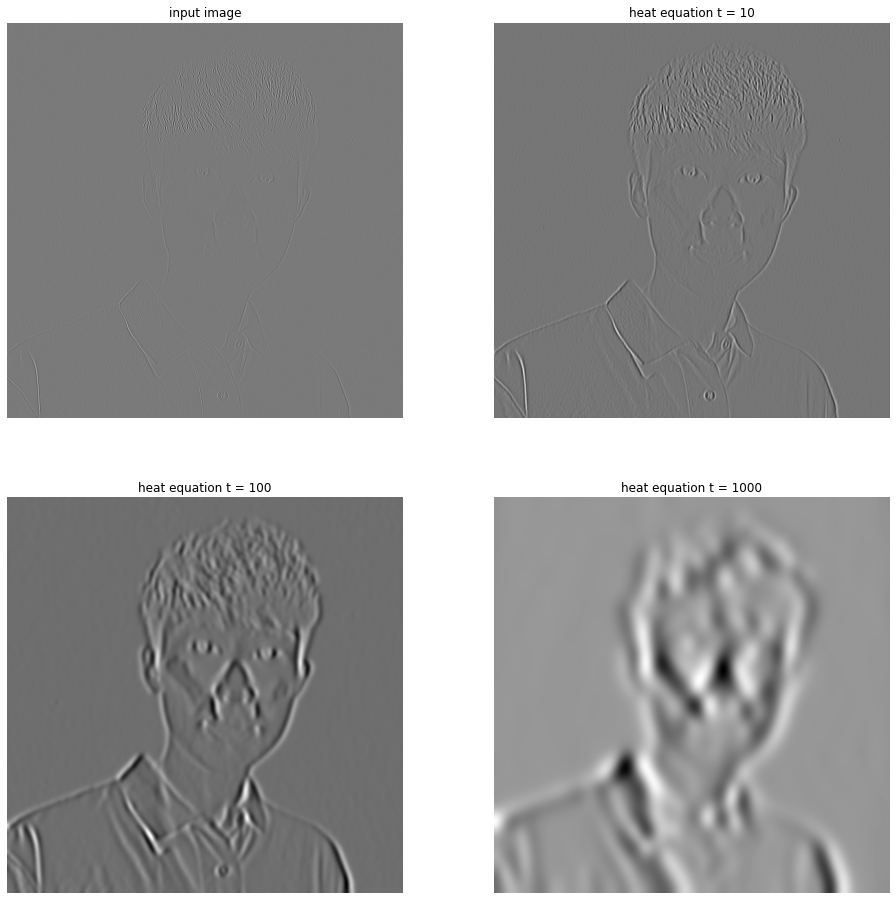

In [15]:
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.imshow(Ixx, cmap='gray')
plt.title('input image')
plt.axis('off')

plt.subplot(222)
plt.imshow(u10_xx, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

plt.subplot(223)
plt.imshow(u100_xx, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

plt.subplot(224)
plt.imshow(u1000_xx, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

(-0.5, 719.5, 719.5, -0.5)

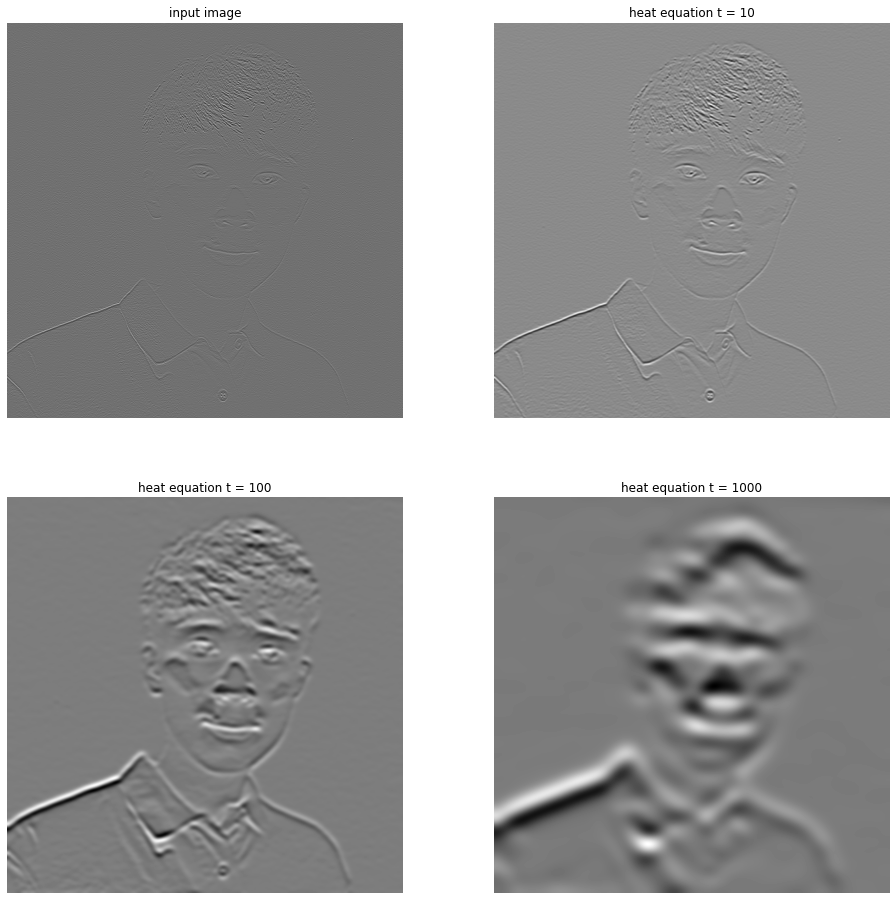

In [16]:
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.imshow(Iyy, cmap='gray')
plt.title('input image')
plt.axis('off')

plt.subplot(222)
plt.imshow(u10_yy, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

plt.subplot(223)
plt.imshow(u100_yy, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

plt.subplot(224)
plt.imshow(u1000_yy, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

## define functions for the visualization

In [17]:
def plot_image_color(I, title='title'):
    plt.figure(figsize=(8,8))
    plt.imshow(I)
    plt.title(title)
    plt.axis('off')
        
        
        
def plot_image_gray(I, title='title'):
    plt.figure(figsize=(8,8))
    plt.imshow(I, cmap='gray')
    plt.title(title)
    plt.axis('off')
    
    
    
def plot_image_gray_2x1(I1, I2, title1='title 1', title2='title 2'):
    plt.figure(figsize=(16,8))

    plt.subplot(121)
    plt.imshow(I1, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(I2, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    
    
def plot_image_gray_2x2(I1, I2, I3, I4, title1='title 1', title2='title 2', title3='title 3', title4='title 4'):
    plt.figure(figsize=(16,16))

    plt.subplot(221)
    plt.imshow(I1, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(I2, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    plt.subplot(223)
    plt.imshow(I3, cmap='gray')
    plt.title(title3)
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(I4, cmap='gray')
    plt.title(title4)
    plt.axis('off')

# Results
<hr>

## 01. plot the input image in color

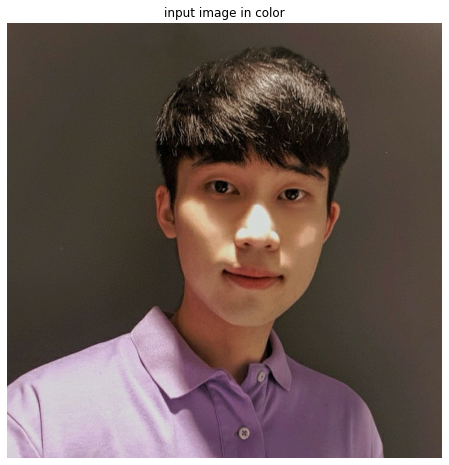

In [18]:
plot_image_color(I_color, 'input image in color')

## 02. plot the input image in gray

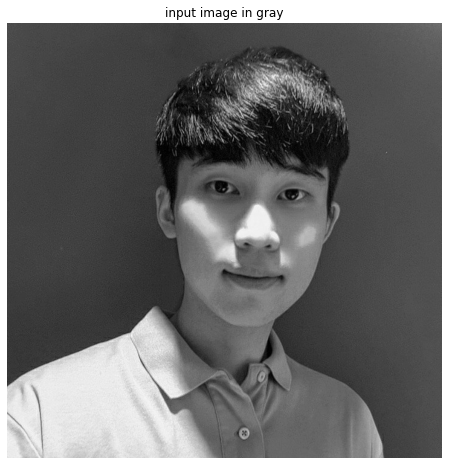

In [19]:
plot_image_gray(I, 'input image in gray')

## 03. plot the (forward) first derivative $I_x$ and $I_y$ of input gray image $I$ with Neumann boundary condition

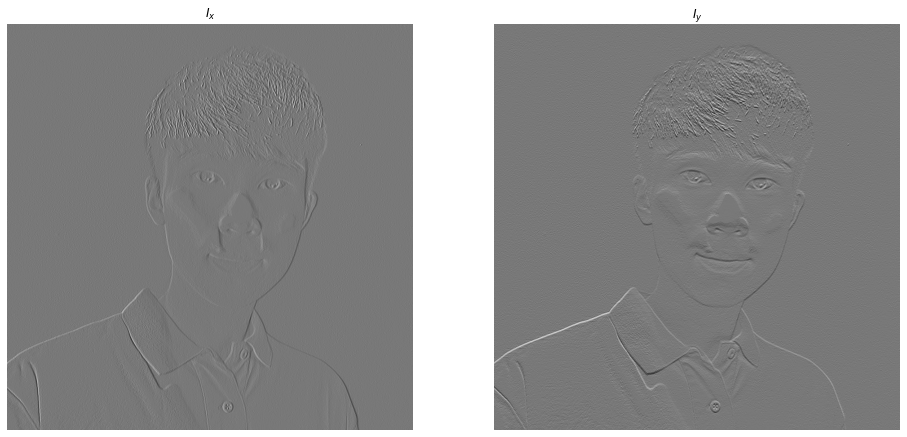

In [20]:
plot_image_gray_2x1(Ix, Iy, '$I_x$','$I_y$')

## 04. plot the second derivative $I_{xx}$ and $I_{yy}$ of input gray image $I$ with Neumann boundary condition

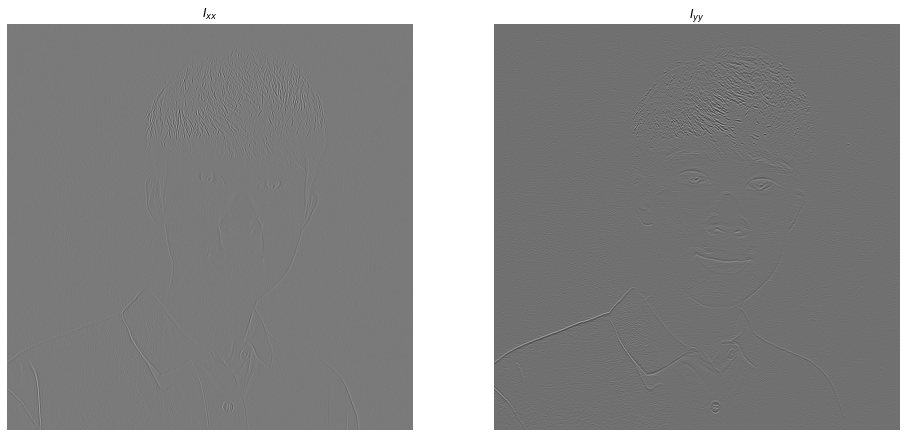

In [21]:
plot_image_gray_2x1(Ixx, Iyy, '$I_{xx}$', '$I_{yy}$')

## 05. plot the original image and its solution of the heat equation with 10, 100, 1000 iterations

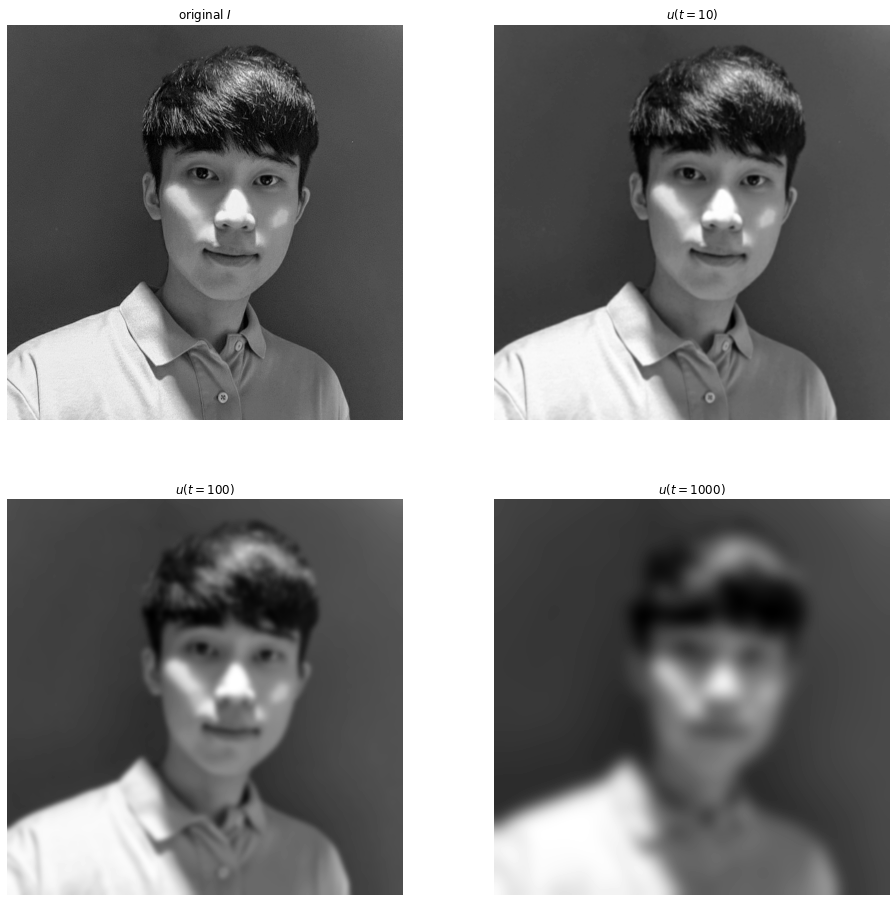

In [22]:
plot_image_gray_2x2(I, u10, u100, u1000, 'original $I$', '$u(t=10)$', '$u(t=100)$', '$u(t=1000)$')

## 06. plot the (forward) first derivative of the solution of the heat equation with 10 iterations

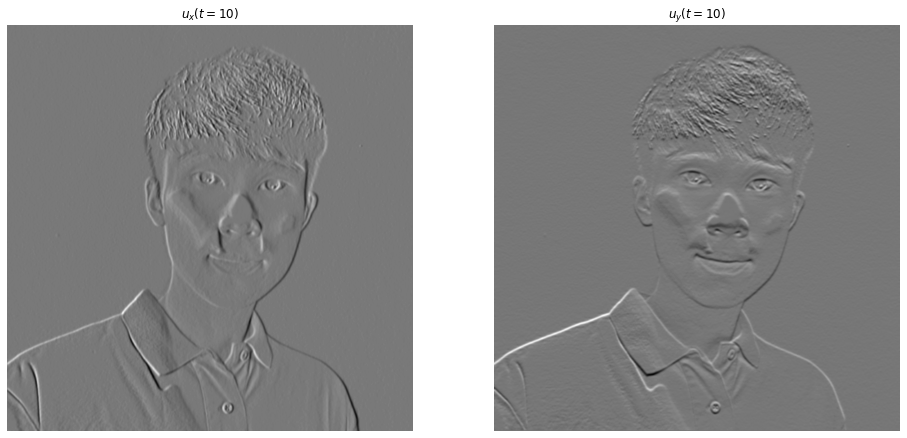

In [23]:
plot_image_gray_2x1(u10_x, u10_y, '$u_x(t=10)$', '$u_y(t=10)$')

## 07. plot the (forward) first derivative of the solution of the heat equation with 100 iterations

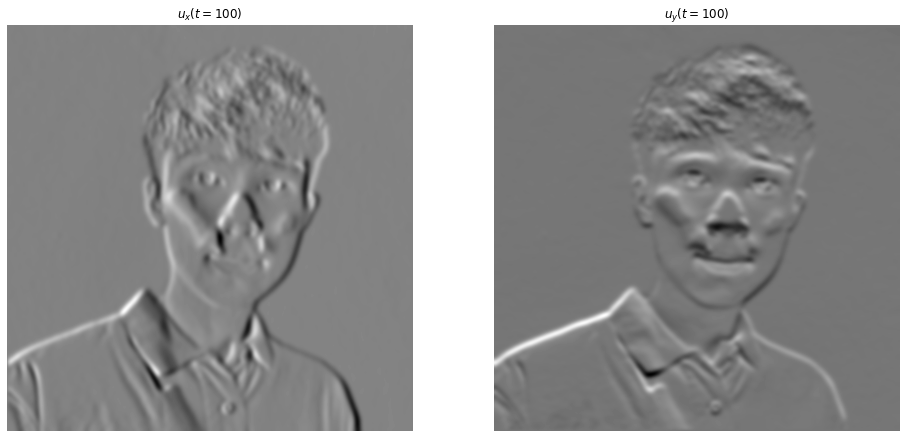

In [24]:
plot_image_gray_2x1(u100_x, u100_y, '$u_x(t=100)$', '$u_y(t=100)$')

## 08. plot the (forward) first derivative of the solution of the heat equation with 1000 iterations

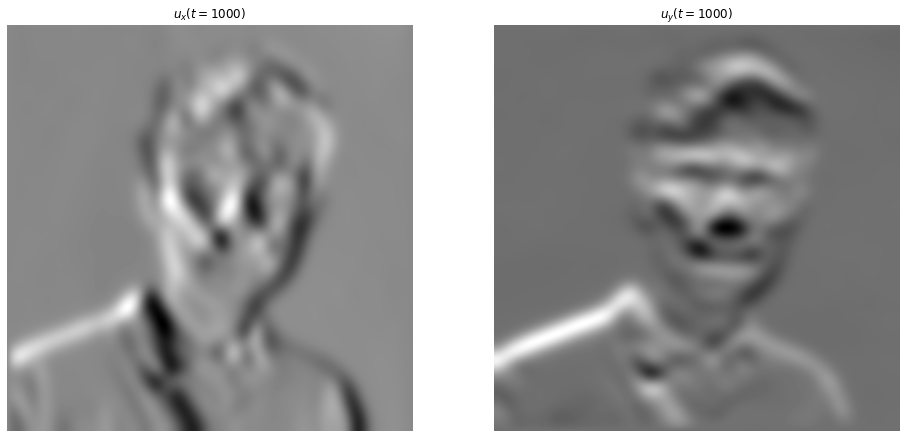

In [25]:
plot_image_gray_2x1(u1000_x, u1000_y, '$u_x(t=1000)$', '$u_y(t=1000)$')